기존 Dataset 코드에서

```python
np.save('D:/git/LipService/x_save', x_data) # x_save.npy
np.save('D:/git/LipService/y_data', y_data) # y_data.npy
```

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense, Dropout,Flatten
from keras.callbacks import EarlyStopping

In [2]:
x_data = np.load('lip/lip_x_data.npy') # x_save.npy
y_data = np.load('lip/lip_y_data.npy') # y_data.npy
y_data = keras.utils.to_categorical(y_data,11)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [3]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
#X_train = X_train / 255
print("X_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

X_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [9]:
import keras
from keras.applications.vgg16 import VGG16 

class VGG_LSTM1(keras.Model):
    def __init__(self, num_classes):
        super(VGG_LSTM1, self).__init__()
        #self.BZ = input_shape[0]
        #self.frame = input_shape[1]

        self.vgg = TimeDistributed(VGG16(weights='imagenet', include_top=False, pooling=max))
        self.vgg.trainable = False

        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode='concat')
        self.dense = layers.Dense(num_classes, activation='softmax')
        self.max_pool = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())

    def call(self, x):
        x = self.vgg(x)
        x = self.flat(x)
        x = self.bilstm(x)
        return self.dense(x)

In [10]:
def get_model_vgg():
    return VGG_LSTM1(num_classes = 11)

In [6]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [11]:
model = get_model_vgg()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#history = model.fit(X_train, Y_train, batch_size=16, epochs=5, verbose = 1, validation_data = (X_test, Y_test))
#model.summary()

58900480/58889256 [==============================] - 7s 0us/step


In [12]:
es = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose = 1, validation_split=0.2, callbacks = [es])

Epoch 1/100
75/75 [==============================] - 1132s 14s/step - loss: 2.4756 - accuracy: 0.1153 - val_loss: 2.3368 - val_accuracy: 0.0883
Epoch 2/100
75/75 [==============================] - 1026s 14s/step - loss: 2.3225 - accuracy: 0.0873 - val_loss: 2.3279 - val_accuracy: 0.0900
Epoch 3/100
75/75 [==============================] - 1035s 14s/step - loss: 2.2816 - accuracy: 0.1320 - val_loss: 2.2832 - val_accuracy: 0.1067
Epoch 4/100
75/75 [==============================] - 1032s 14s/step - loss: 2.2358 - accuracy: 0.1526 - val_loss: 2.2683 - val_accuracy: 0.1217
Epoch 5/100
75/75 [==============================] - 1010s 14s/step - loss: 2.1959 - accuracy: 0.1846 - val_loss: 2.2462 - val_accuracy: 0.1333
Epoch 6/100
75/75 [==============================] - 1030s 14s/step - loss: 2.1353 - accuracy: 0.2119 - val_loss: 2.1886 - val_accuracy: 0.1750
Epoch 7/100
75/75 [==============================] - 1022s 14s/step - loss: 1.9987 - accuracy: 0.2573 - val_loss: 2.0265 - val_accuracy:

In [13]:
history.history

{'loss': [2.395000457763672,
  2.3140785694122314,
  2.2777984142303467,
  2.2271649837493896,
  2.1805996894836426,
  2.121126413345337,
  1.992339849472046,
  1.852919101715088,
  1.7640044689178467,
  1.674660086631775,
  1.5575413703918457,
  1.4637668132781982,
  1.4266777038574219,
  1.334524154663086,
  1.2472050189971924,
  1.1542731523513794,
  1.077195644378662,
  1.0185320377349854,
  0.9607216119766235,
  0.8631971478462219,
  0.7866160869598389,
  0.7309669256210327,
  0.6960575580596924,
  0.646492600440979,
  0.6245788931846619,
  0.5352057218551636,
  0.5090493559837341,
  0.4517524242401123,
  0.4542173147201538,
  0.3493950664997101,
  0.37632158398628235,
  0.3353324830532074,
  0.3237254023551941,
  0.25812551379203796,
  0.21549974381923676,
  0.2152031511068344,
  0.18995575606822968,
  0.22617581486701965,
  0.24212408065795898],
 'accuracy': [0.10958333313465118,
  0.10333333164453506,
  0.13375000655651093,
  0.15666666626930237,
  0.18833333253860474,
  0.2208

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


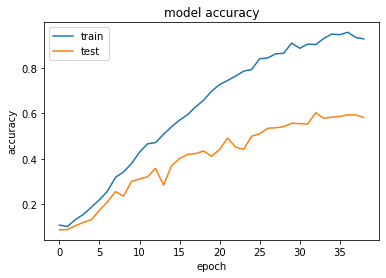

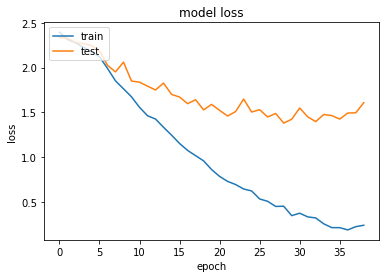

In [14]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()